Task-1

Data Understanding and Visualization:

##Importing all the necessary libraries

In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task-1

##Data understanding and Visualization

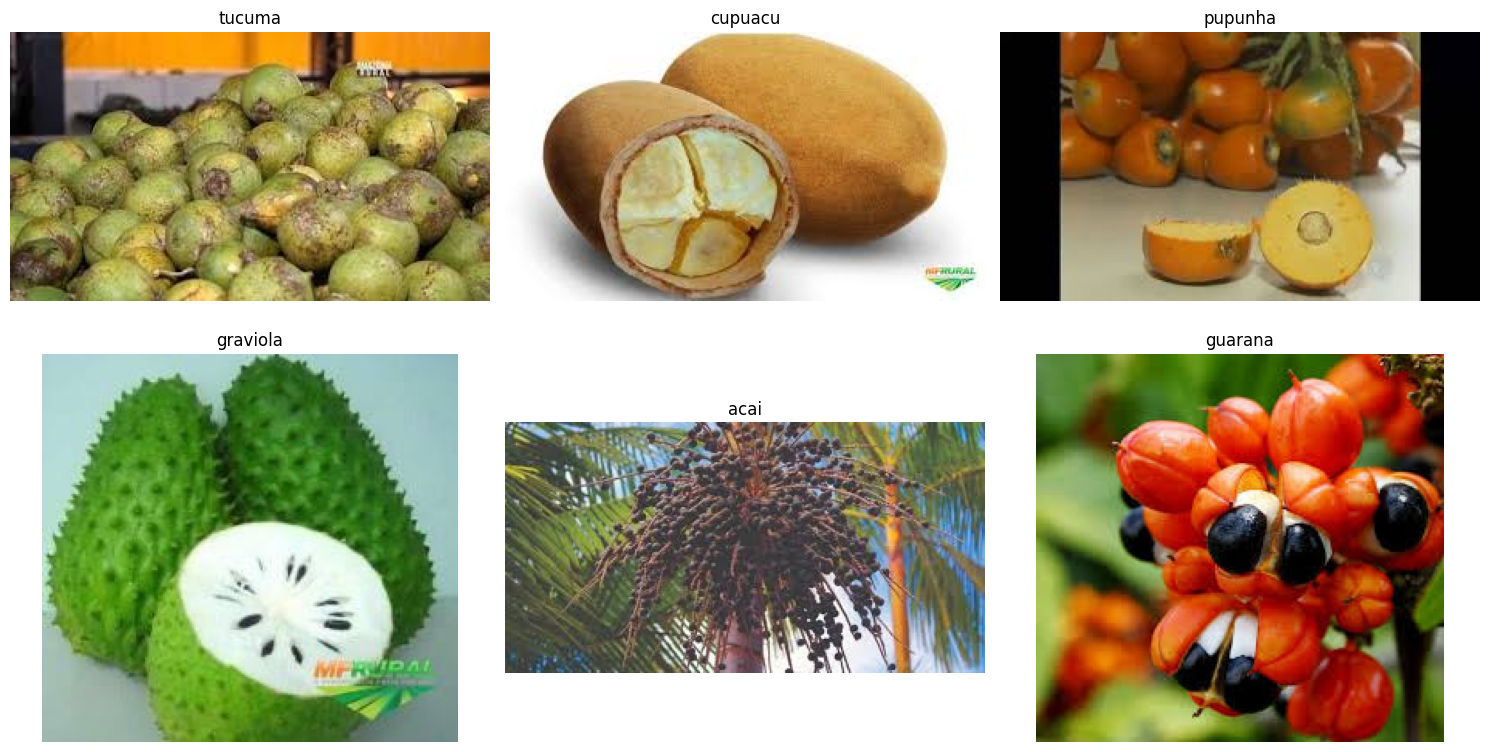

In [8]:
# Path to the train dataset
train_dir = "/content/drive/MyDrive/AI and ML Workshop/Week-5/FruitinAmazon/FruitinAmazon/train"

# Get list of class directories
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
selected_images = []
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('png', 'jpg', 'jpeg'))]
    if images:
        img_path = os.path.join(class_path, random.choice(images))
        selected_images.append((cls, img_path))

# Set up grid dimensions
num_classes = len(selected_images)
num_cols = (num_classes + 1) // 2  # Two rows
fig, axes = plt.subplots(2, num_cols, figsize=(15, 8))
axes = axes.flatten()

# Display images
for i, (cls, img_path) in enumerate(selected_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(cls)
    axes[i].axis("off")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

We can observe that each image displayed here in the output represents a different class from the training dataset. And the output varies everytime we run the code i.e. everytime a different random image is displayed.

##Checking for any corrupted images

In [9]:

# Path to the train dataset
train_dir = "/content/drive/MyDrive/AI and ML Workshop/Week-5/FruitinAmazon/FruitinAmazon/train"

# Getting list of class directories
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Checking for corrupted images
corrupted_images = []
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('png', 'jpg', 'jpeg'))]
    for img in images:
        img_path = os.path.join(class_path, img)
        try:
            with Image.open(img_path) as im:
                im.verify()  # Verify image integrity
        except (UnidentifiedImageError, IOError, SyntaxError):
            os.remove(img_path)
            corrupted_images.append(img_path)
            print(f"Removed corrupted image: {img_path}")

if not corrupted_images:
    print("No corrupted images found.")


No corrupted images found.


Task-2

In [10]:
import tensorflow as tf

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Path to the dataset
train_dir = "/content/drive/MyDrive/AI and ML Workshop/Week-5/FruitinAmazon/FruitinAmazon/train"

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply normalization to training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply normalization to validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Print dataset info
print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {val_ds}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Task-3

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define input shape
input_shape = (128, 128, 3)  # Height, Width, Channels
num_classes =6

# Define CNN model
model = keras.Sequential([
    layers.Input(shape=input_shape),

    # Convolutional Layer 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")
])
# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Task-4

##Compile the model

In [12]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("Model compiled successfully using SGD optimizer")



Model compiled successfully using SGD optimizer


Task-4

##Train the Model

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min", verbose=1)
early_stopping_cb = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)

# Compile the model with SGD optimizer (as we changed it earlier)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # SGD optimizer with learning rate 0.01
              loss="sparse_categorical_crossentropy",  # Loss function for multi-class classification
              metrics=["accuracy"])  # Evaluation metric

# Train the model
history = model.fit(train_ds,  # Training dataset
                    validation_data=val_ds,  # Validation dataset
                    batch_size=16,  # Batch size
                    epochs=250,  # Number of epochs
                    callbacks=[checkpoint_cb, early_stopping_cb])  # Using callbacks

print("Model training complete!")



Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.1950 - loss: 1.7918
Epoch 1: val_loss improved from inf to 1.96432, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1949 - loss: 1.7927 - val_accuracy: 0.0000e+00 - val_loss: 1.9643
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.1794 - loss: 1.7818
Epoch 2: val_loss improved from 1.96432 to 1.76457, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1832 - loss: 1.7810 - val_accuracy: 0.0000e+00 - val_loss: 1.7646
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.1690 - loss: 1.7713
Epoch 3: val_loss did not improve from 1.76457
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 443ms/step - accuracy: 0.1753 - loss: 1.7699 - val_accuracy: 0.0000e+00 - val_loss: 2.2863
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.1939 - loss: 1.8304
Epoch 4: val_loss did not improve from 1.76457
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 563ms/step - accuracy: 0.2010 - loss: 1.8250 - val_accuracy: 0.0000e+00 - val_loss: 1.7685
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.3368 - loss: 1.7504
Epoch 5: val_loss did not improve from 1.76457
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 780ms/step - accuracy: 0.3255 - loss: 1.7507 - val_accuracy: 0.0000e+00 - val_loss: 2.0402
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.1586 - loss: 1.8117
Epoch 6: val_loss did not improve from 1.76457

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 418ms/step - accuracy: 0.1988 - loss: 1.6811 - val_accuracy: 0.2222 - val_loss: 1.6093
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.3299 - loss: 1.6960
Epoch 10: val_loss did not improve from 1.60929
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step - accuracy: 0.3307 - loss: 1.6942 - val_accuracy: 0.0000e+00 - val_loss: 1.9123
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.3247 - loss: 1.6410
Epoch 11: val_loss did not improve from 1.60929
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step - accuracy: 0.3268 - loss: 1.6430 - val_accuracy: 0.0000e+00 - val_loss: 2.0341
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.2344 - loss: 1.6501
Epoch 12: val_loss did not improve from 1.60929
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 640ms/step - accuracy: 0.2383 - loss: 1.6472 - val_accuracy: 0.2778 - val_loss: 1.7729
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.3993 - loss: 1.6116
Epoch 13: val_loss did not improve from 1.60

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.2956 - loss: 1.6384 - val_accuracy: 0.6111 - val_loss: 1.4683
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5862 - loss: 1.4915
Epoch 16: val_loss did not improve from 1.46833
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - accuracy: 0.5786 - loss: 1.4942 - val_accuracy: 0.0556 - val_loss: 1.7180
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.3247 - loss: 1.4901
Epoch 17: val_loss did not improve from 1.46833
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.3268 - loss: 1.4906 - val_accuracy: 0.4444 - val_loss: 1.5475
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.4265 - loss: 1.4367
Epoch 18: val_loss did not improve from 1.46833
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step - accuracy: 0.4171 - loss: 1.4466 - val_accuracy: 0.1111 - val_loss: 2.1957
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.3223 - loss: 1.5552
Epoch 19: val_loss did not improve from 1.46833
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 734ms/step - accuracy: 0.4579 - loss: 1.4077 - val_accuracy: 0.6111 - val_loss: 1.3907
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.4855 - loss: 1.3281
Epoch 21: val_loss did not improve from 1.39072
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 0.4822 - loss: 1.3287 - val_accuracy: 0.5000 - val_loss: 1.4747
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.4184 - loss: 1.3778
Epoch 22: val_loss improved from 1.39072 to 1.16581, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 777ms/step - accuracy: 0.4284 - loss: 1.3687 - val_accuracy: 0.7222 - val_loss: 1.1658
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6580 - loss: 1.2960
Epoch 23: val_loss did not improve from 1.16581
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 572ms/step - accuracy: 0.6393 - loss: 1.2989 - val_accuracy: 0.0000e+00 - val_loss: 2.7266
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.4531 - loss: 1.4962
Epoch 24: val_loss did not improve from 1.16581
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 490ms/step - accuracy: 0.4648 - loss: 1.4849 - val_accuracy: 0.3333 - val_loss: 1.5092
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4780 - loss: 1.3936
Epoch 25: val_loss did not improve from 1.16581
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step - accuracy: 0.4905 - loss: 1.3807 - val_accuracy: 0.7778 - val_loss: 1.1688
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.6007 - loss: 1.1968
Epoch 26: val_loss did not improve from 1.16581


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step - accuracy: 0.4553 - loss: 1.3525 - val_accuracy: 0.3889 - val_loss: 1.1506
Epoch 28/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5145 - loss: 1.3515
Epoch 28: val_loss did not improve from 1.15061
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.5178 - loss: 1.3359 - val_accuracy: 0.5556 - val_loss: 1.2563
Epoch 29/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.6505 - loss: 1.0924
Epoch 29: val_loss improved from 1.15061 to 1.09673, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.6476 - loss: 1.0938 - val_accuracy: 0.6111 - val_loss: 1.0967
Epoch 30/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6962 - loss: 1.0159
Epoch 30: val_loss improved from 1.09673 to 1.00192, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 601ms/step - accuracy: 0.6888 - loss: 1.0181 - val_accuracy: 0.7222 - val_loss: 1.0019
Epoch 31/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.4444 - loss: 1.0866
Epoch 31: val_loss did not improve from 1.00192
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 604ms/step - accuracy: 0.4479 - loss: 1.0830 - val_accuracy: 0.7222 - val_loss: 1.1703
Epoch 32/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.7043 - loss: 1.0552
Epoch 32: val_loss improved from 1.00192 to 0.88657, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.6775 - loss: 1.0820 - val_accuracy: 0.8333 - val_loss: 0.8866
Epoch 33/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7350 - loss: 1.0547
Epoch 33: val_loss did not improve from 0.88657
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.7352 - loss: 1.0401 - val_accuracy: 0.6667 - val_loss: 1.0445
Epoch 34/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.7297 - loss: 0.8695
Epoch 34: val_loss did not improve from 0.88657
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.7313 - loss: 0.8698 - val_accuracy: 0.2222 - val_loss: 2.2715
Epoch 35/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.4745 - loss: 1.3804
Epoch 35: val_loss did not improve from 0.88657
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.4774 - loss: 1.3696 - val_accuracy: 0.7222 - val_loss: 1.0948
Epoch 36/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.8310 - loss: 0.8113
Epoch 36: val_loss did not improve from 0.88657
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.6545 - loss: 0.8485 - val_accuracy: 0.7778 - val_loss: 0.7657
Epoch 42/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.5758 - loss: 1.1240
Epoch 42: val_loss did not improve from 0.76568
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 733ms/step - accuracy: 0.6020 - loss: 1.0920 - val_accuracy: 0.5556 - val_loss: 1.2054
Epoch 43/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.9155 - loss: 0.6514
Epoch 43: val_loss did not improve from 0.76568
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 492ms/step - accuracy: 0.9123 - loss: 0.6509 - val_accuracy: 0.7778 - val_loss: 0.9440
Epoch 44/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.7610 - loss: 0.7627
Epoch 44: val_loss did not improve from 0.76568
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - accuracy: 0.7548 - loss: 0.7700 - val_accuracy: 0.4444 - val_loss: 1.2868
Epoch 45/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.6829 - loss: 0.7354
Epoch 45: val_loss improved from 0.76568 to 0.61199,

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 0.6962 - loss: 0.7303 - val_accuracy: 0.8889 - val_loss: 0.6120
Epoch 46/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.8704 - loss: 0.5591
Epoch 46: val_loss did not improve from 0.61199
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 0.8681 - loss: 0.5625 - val_accuracy: 0.0556 - val_loss: 1.9096
Epoch 47/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.7836 - loss: 0.6332
Epoch 47: val_loss did not improve from 0.61199
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.7925 - loss: 0.6264 - val_accuracy: 0.1667 - val_loss: 2.8310
Epoch 48/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.5446 - loss: 1.2493
Epoch 48: val_loss did not improve from 0.61199
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 680ms/step - accuracy: 0.5473 - loss: 1.2381 - val_accuracy: 0.2222 - val_loss: 1.7680
Epoch 49/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.6418 - loss: 0.9289
Epoch 49: val_loss did not improve from 0.61199
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 676ms/step - accuracy: 0.7995 - loss: 0.6706 - val_accuracy: 0.7778 - val_loss: 0.4632
Epoch 55/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.8692 - loss: 0.4024
Epoch 55: val_loss did not improve from 0.46323
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 694ms/step - accuracy: 0.8741 - loss: 0.4024 - val_accuracy: 0.0000e+00 - val_loss: 2.2703
Epoch 56/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.6476 - loss: 0.7001
Epoch 56: val_loss did not improve from 0.46323
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step - accuracy: 0.6628 - loss: 0.6813 - val_accuracy: 0.6667 - val_loss: 1.1414
Epoch 57/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.9855 - loss: 0.2793
Epoch 57: val_loss did not improve from 0.46323
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.9822 - loss: 0.2815 - val_accuracy: 0.7778 - val_loss: 0.7867
Epoch 58/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8443 - loss: 0.4239
Epoch 58: val_loss did not improve from 0.46323


Task-5

##Evaluate the Model

In [15]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(train_ds)

# Print the results
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8424 - loss: 0.4414
Test Accuracy: 0.8333
Test Loss: 0.4619


Task-6

##Save and Load the Model


In [16]:
# Save the trained model
model.save("fruit_classification_model.h5")
print("Model saved successfully!")


Model saved successfully!


Loading the saved module

In [17]:
# Load the saved model
loaded_model = tf.keras.models.load_model("fruit_classification_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [18]:
# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(train_ds)

# Print the results
print(f"Loaded Model Test Accuracy: {test_acc:.4f}")
print(f"Loaded Model Test Loss: {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8151 - loss: 0.4747
Loaded Model Test Accuracy: 0.8333
Loaded Model Test Loss: 0.4619


 Task 7: Predictions and Classification Report

 Making Predictions
 • Use model.predict() to make predictions on test images.

 • Convert the model’s predicted probabilities to digit labels using np.argmax().

 • Also use from sklearn.metrics imp

In [19]:
import numpy as np

# Get predictions from the model
predictions = model.predict(train_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step


In [20]:
# Extract true labels from the test dataset
true_labels = np.concatenate([y.numpy() for x, y in train_ds])

In [21]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.21      0.21      0.21        14
           1       0.12      0.08      0.10        13
           2       0.08      0.08      0.08        12
           3       0.40      0.20      0.27        10
           4       0.11      0.18      0.13        11
           5       0.15      0.17      0.16        12

    accuracy                           0.15        72
   macro avg       0.18      0.15      0.16        72
weighted avg       0.17      0.15      0.16        72



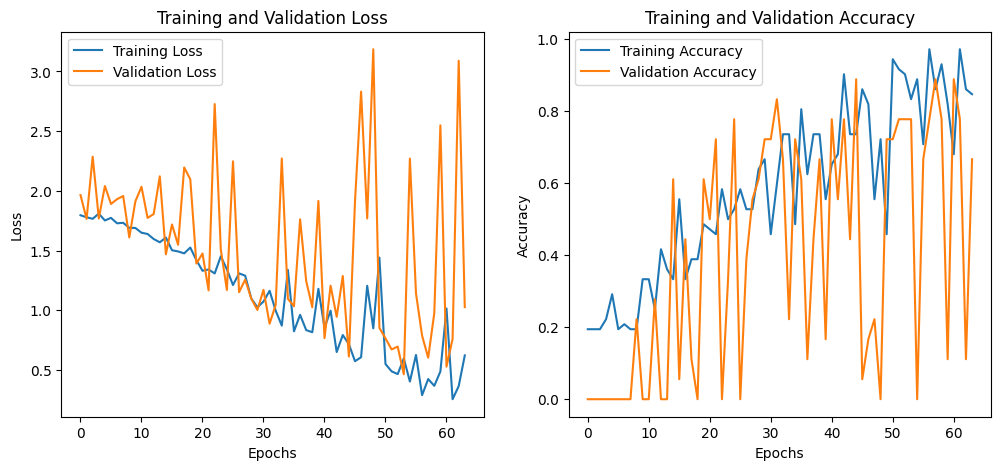

In [22]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing model training history
history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Training Loss")
plt.plot(history_dict["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict["accuracy"], label="Training Accuracy")
plt.plot(history_dict["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()